<a href="https://colab.research.google.com/github/anju1982/Anju/blob/main/hyperparametertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.7 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
print(tf.__version__)

2.9.2


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
# we are taking data directly from net
#scaling from 0-1
np.min(train_images)

0

In [8]:
np.max(train_images)#to obtain the min and max value of test and train images

255

In [9]:
np.min(test_images)

0

In [10]:
np.max(test_images)

255

In [11]:
train_images = train_images/255.0#normalization
test_images = test_images/255.0

In [12]:
print("Train Minimum", np.min(train_images))#checking min and max values .it is between 0 and 1
print("Train Maximum",np.max(train_images))
print("Test Minimum",np.min(test_images))
print("Test Maximum",np.max(test_images))

Train Minimum 0.0
Train Maximum 1.0
Test Minimum 0.0
Test Maximum 1.0


In [13]:
train_images[0].shape#image size 28,28

(28, 28)

In [14]:
train_images[0]#after normalising,testing and training is done

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

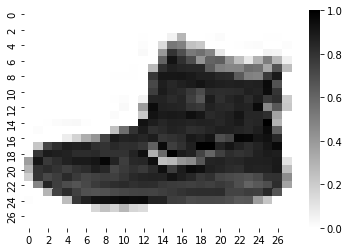

In [16]:
plt.Figure(figsize=(15,15))#width and height
sns.heatmap(train_images[0],cmap="binary")


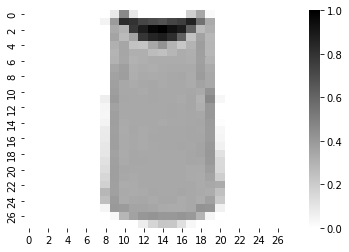

In [17]:
plt.Figure(figsize=(15,15))#width and height
sns.heatmap(train_images[2],cmap="binary")


In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
#Reshaping the data to feed into CNN
train_images = train_images.reshape(len(train_images), 28,28,1)# 1 is the number of channels,black and white so channel is1
test_images = test_images.reshape(len(test_images), 28,28,1)

In [21]:
train_images.shape

(60000, 28, 28, 1)

In [23]:
#Tuning functions
#parameters other than weight and bias are hyper parameters/random search tuner,hyperband tuner,Bayesian Optimization tuner
#first one picks the combinations in arandom manner to find accuracy by trial and error and picjs the best combinations
#hyperband tuner if any value is not performing well it will omit it at the time of execution
#Bayesianhis techniques addresses a common problem in RandomSearch and Hyperband. Problem:
# All the hyperparameter combinations are chosen randomly. Choosing hyperparameters randomly helps to explore the hyperparameter space but does not guarantee absolute optimal hyperparameters. Solution provided by BayesianOptimization tuner: Instead of all combinations being random, it chooses first few randomly, then based on the performance on these hyperparameters it chooses the next best possible hyperparameters. Hence it takes into account the history of the hyperparameters which were tried. The iterations of choosing next set of hyperparameters based on history and evaluating performance continues till the tuner reaches optimal hyperparameters or exhausts maximum number of allowed trails. Maximum trials are set using parameter ‘max_trails
def build_model(hp):  
  model = keras.Sequential([#filters and kernel size are the hyper parameters,we want to try values from 32,to 128 for our filters
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),#step size means first 32 then 32+16...
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),#it will choose 3 or 5
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),#adam optimizer is used.(adaptive and gradient descent are two types of optimoizers)
              loss='sparse_categorical_crossentropy',#loss=difference between expected output and actual output
              metrics=['accuracy'])#standardised value for learning rate is .001 # hp.always related to tuning
  
  return model#build model fn

In [24]:
from kerastuner import RandomSearch#
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-24-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [25]:
tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [26]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)#tuning happens here ,we are doing 3 epochs and 5 trials.It gives the best value out of 5 trials

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.8999999761581421

Best val_accuracy So Far: 0.9113333225250244
Total elapsed time: 00h 03m 06s


In [27]:
model=tuner_search.get_best_models(num_models=1)[0]

In [28]:
model.summary()#lists the best configuration obtained after tuning

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 112)               3469424   
                                                                 
 dense_1 (Dense)             (None, 10)                1130      
                                                                 
Total params: 3,547,674
Trainable params: 3,547,674
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)#initial epoch is 3 because we have already done tuning with epoch=3,now we start with epoch=4

Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1503 - accuracy: 0.9431 - val_loss: 0.2831 - val_accuracy: 0.9092
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1101 - accuracy: 0.9586 - val_loss: 0.2652 - val_accuracy: 0.9152
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0819 - accuracy: 0.9684 - val_loss: 0.3237 - val_accuracy: 0.9123
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0607 - accuracy: 0.9775 - val_loss: 0.3845 - val_accuracy: 0.9065
Epoch 8/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0451 - accuracy: 0.9833 - val_loss: 0.4258 - val_accuracy: 0.9112
Epoch 9/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0366 - accuracy: 0.9866 - val_loss: 0.4931 - val_accuracy: 0.9113
Epoch 10/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0295 - accuracy: 0.9896 - val_loss: 0.5145 - val_acc

In [30]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5456 - accuracy: 0.9106


In [31]:
loss

0.5455647706985474

In [32]:
accuracy

0.9106000065803528

In [33]:
tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 112
learning_rate: 0.001
Score: 0.9113333225250244
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 64
learning_rate: 0.001
Score: 0.909333348274231
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 112
learning_rate: 0.001
Score: 0.8999999761581421
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 112
learning_rate: 0.01
Score: 0.8598333597183228
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 64
learning_rate: 0.01
Score: 0.8501666784286499
